<a href="https://colab.research.google.com/github/sindhura-nk/Artificial-Intelligence-1446/blob/main/Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy==1.26.4 pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 53.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 37.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you ha

## Data Gathering

In [ ]:
from warnings import filterwarnings

filterwarnings("ignore")

In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/sindhura-nk/Datasets/refs/heads/main/AirPassengers.csv"
df = pd.read_csv(url, index_col="Month", parse_dates=True)
df

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


## Data Cleaning and Preprocessing

If the data is missing,the plot would look a bit similar to below figure
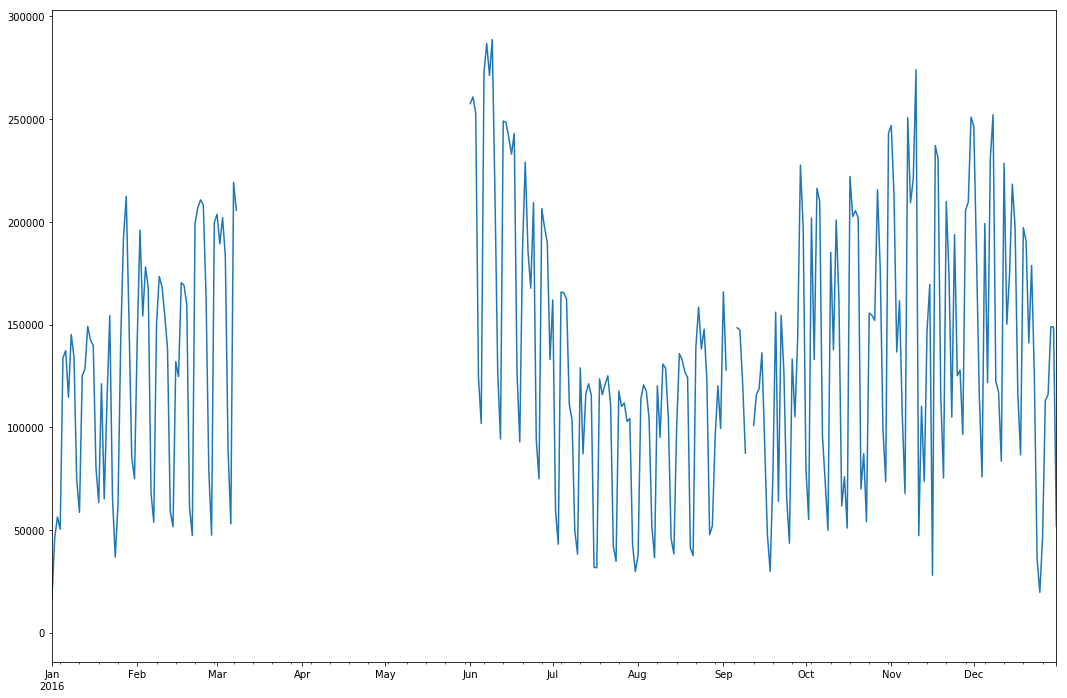

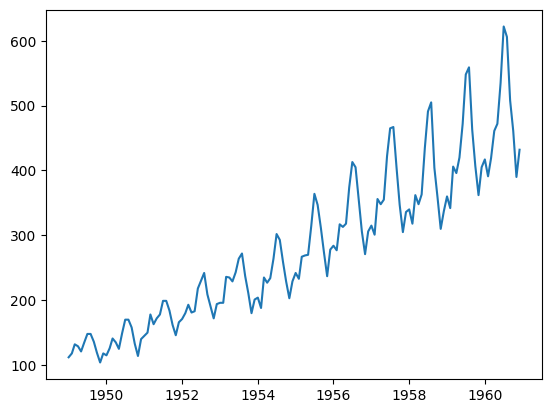

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df['Passengers'])
plt.show()

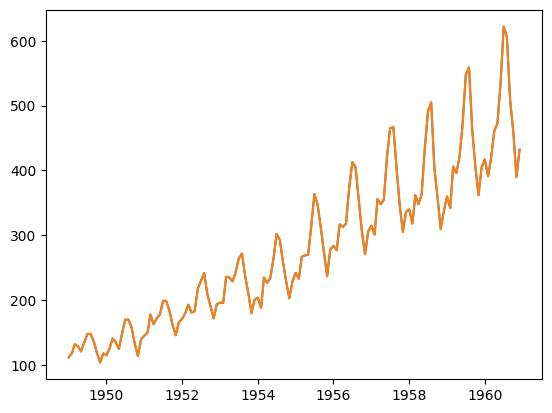

In [ ]:
df['Linear'] = df['Passengers'].interpolate(method='Linear')
import matplotlib.pyplot as plt
plt.plot(df['Passengers'])
plt.plot(df['Linear'])
plt.show()

## Denoising a Time Series

**Rolling means**

The Rolling mean is simply the mean for a window of previous observations, where the window is a sequence of values from the time series data. Mean is calculated for each ordered window. This can greatly help in minimizing the noise in time series data.

In [ ]:
rolling_data = df['Passengers'].rolling(3).mean()
rolling_data

,Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,120.666667
1949-04-01,126.333333
1949-05-01,127.333333
...,...
1960-08-01,587.666667
1960-09-01,578.666667
1960-10-01,525.000000


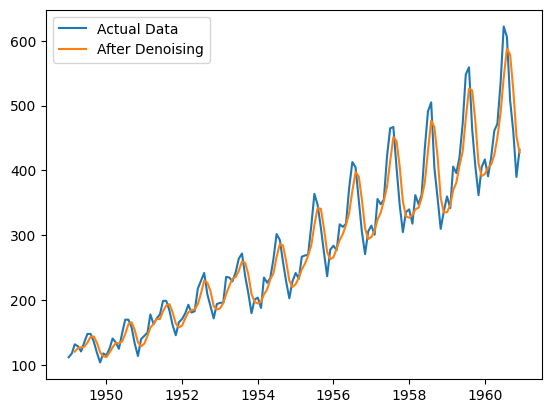

In [ ]:
plt.plot(df['Passengers'],label="Actual Data")
plt.plot(rolling_data,label="After Denoising")
plt.legend()
plt.show()

## Resampling Data

In [ ]:
df.resample('YE').sum()

,Passengers,Linear
Month,,
1949-12-31,1520,1520
1950-12-31,1676,1676
1951-12-31,2042,2042
1952-12-31,2364,2364
1953-12-31,2700,2700
1954-12-31,2867,2867
1955-12-31,3408,3408
1956-12-31,3939,3939
1957-12-31,4421,4421


In [ ]:
df.resample('YE').mean()

,Passengers,Linear
Month,,
1949-12-31,126.666667,126.666667
1950-12-31,139.666667,139.666667
1951-12-31,170.166667,170.166667
1952-12-31,197.000000,197.000000
1953-12-31,225.000000,225.000000
1954-12-31,238.916667,238.916667
1955-12-31,284.000000,284.000000
1956-12-31,328.250000,328.250000
1957-12-31,368.416667,368.416667


In [ ]:
df.resample('YE').min()

,Passengers,Linear
Month,,
1949-12-31,104,104
1950-12-31,114,114
1951-12-31,145,145
1952-12-31,171,171
1953-12-31,180,180
1954-12-31,188,188
1955-12-31,233,233
1956-12-31,271,271
1957-12-31,301,301


In [ ]:
df.resample('Q').sum()

,Passengers,Linear
Month,,
1949-03-31,362,362
1949-06-30,385,385
1949-09-30,432,432
1949-12-31,341,341
1950-03-31,382,382
1950-06-30,409,409
1950-09-30,498,498
1950-12-31,387,387
1951-03-31,473,473


## Time Series Decomposition

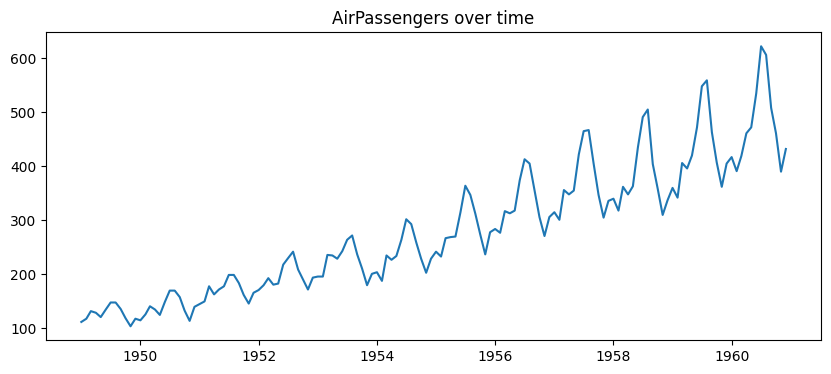

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
plt.plot(df["Passengers"])
plt.title("AirPassengers over time")
plt.show()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

## Additive Decomposition

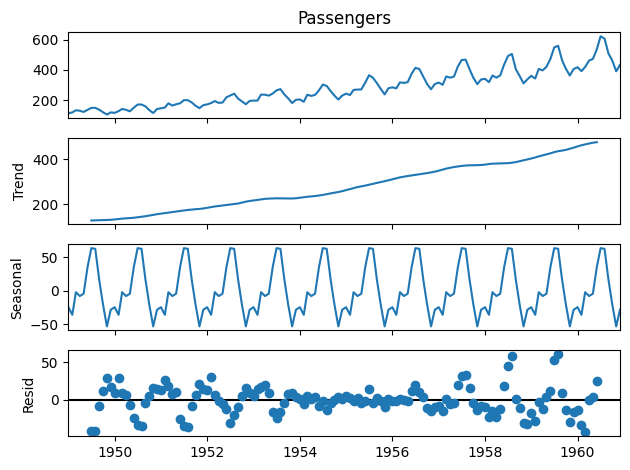

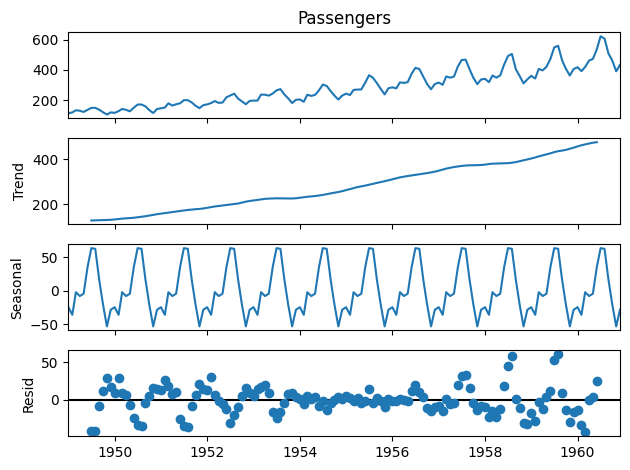

In [ ]:
qa = seasonal_decompose(df["Passengers"], model="additive")
qa.plot()

## Trend

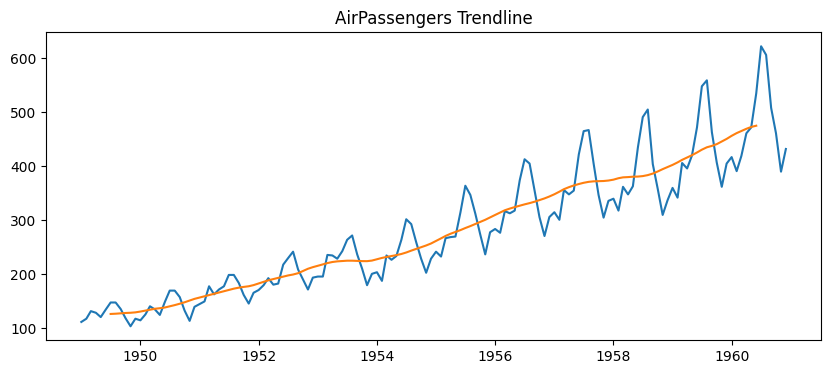

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
plt.plot(qa.observed)
plt.plot(qa.trend)
plt.title("AirPassengers Trendline")
plt.show()

## Seasonal

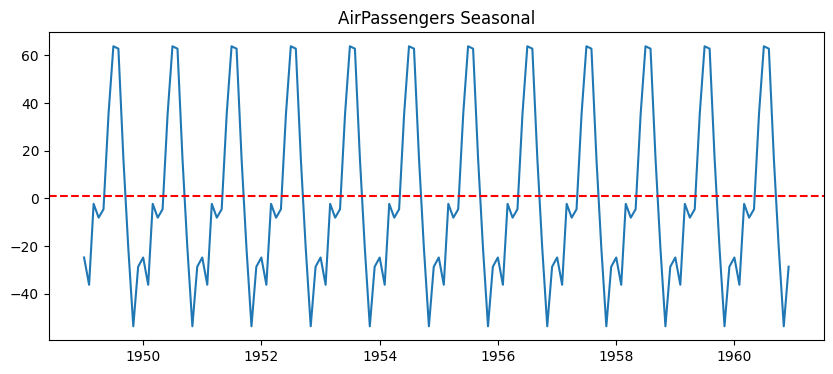

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(qa.seasonal)
plt.axhline(y=1, color="red", ls="--")
plt.title("AirPassengers Seasonal")
plt.show()

## Residual

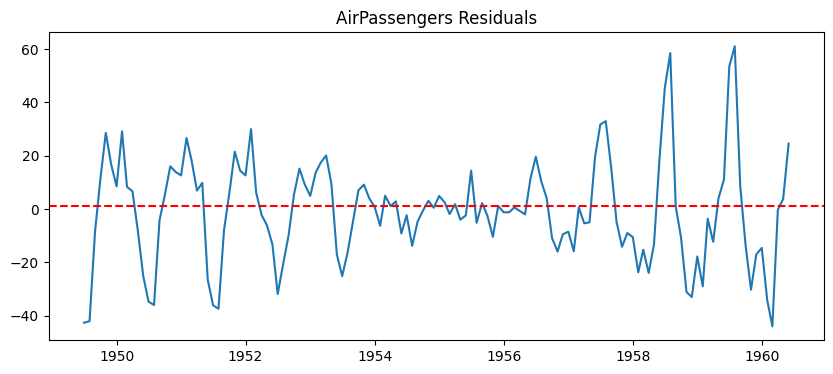

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(qa.resid)
plt.axhline(y=1, color = "red", ls="--")
plt.title("AirPassengers Residuals")
plt.show()

## Multiplicative Decomposition

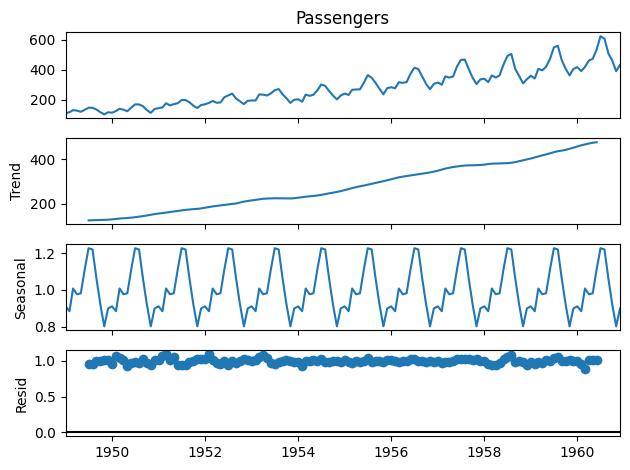

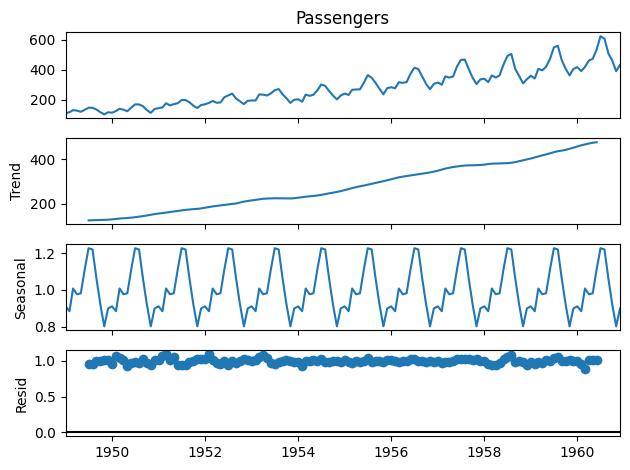

In [ ]:
q = seasonal_decompose(df["Passengers"], model="multiplicative")
q.plot()

## Trend

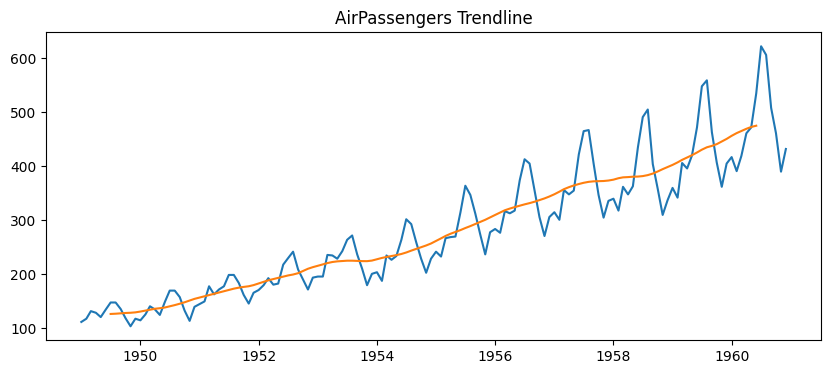

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
plt.plot(q.observed)
plt.plot(q.trend)
plt.title("AirPassengers Trendline")
plt.show()

## Seasonal

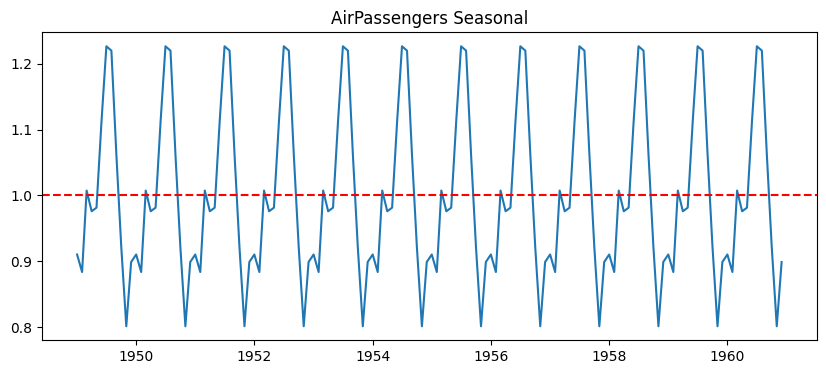

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(q.seasonal)
plt.axhline(y=1, color="red", ls="--")
plt.title("AirPassengers Seasonal")
plt.show()

## Residual

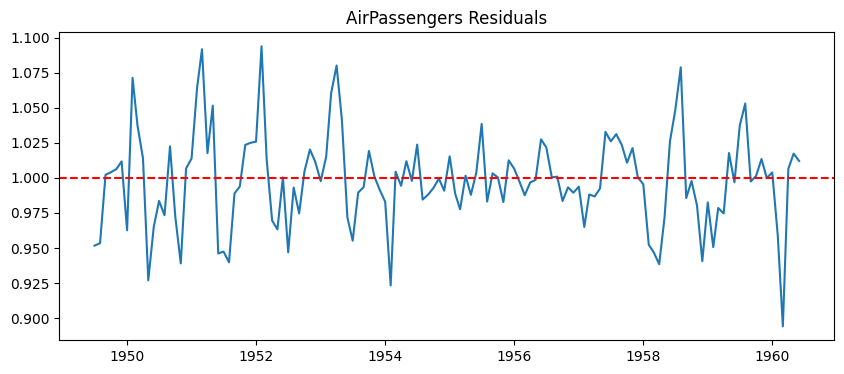

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(q.resid)
plt.axhline(y=1, color = "red", ls="--")
plt.title("AirPassengers Residuals")
plt.show()

## Checking Stationarity of Time Series using ADF

In [ ]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(df["Passengers"])
print(f"ADF Statistic: {round(adf_test[0],2)}")
print(f"p value: {adf_test[1]}")

ADF Statistic: 0.82
p value: 0.991880243437641


### p value is greater than 0.05 indicating non-stationarity in data

#### Making the data stationary by applying first-order differencing to the time series, which means it subtracts each value from its previous value to remove trends and stabilize the mean.

In [ ]:
# Apply first-order differencing
df_diff = df.diff().dropna()
adf_result_diff = adfuller(df_diff['Passengers'])
print(f'Differenced ADF Statistic: {adf_result_diff[0]:.4f}')
print(f'p-value: {adf_result_diff[1]:.4f}')

Differenced ADF Statistic: -2.8293
p-value: 0.0542


In [ ]:
import pmdarima as pm

In [ ]:
model = pm.auto_arima(
    df["Passengers"],
    seasonal=True,
    m=12,
    trace=True,
    error_action='ignore',
    suppress_warnings=True
)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=1020.048, Time=4.81 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.16 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.29 sec
 ARIMA(2,1,2)(0,1,1)[12]             : AIC=1019.935, Time=0.97 sec
 ARIMA(2,1,2)(0,1,0)[12]             : AIC=1019.290, Time=0.37 sec
 ARIMA(2,1,2)(1,1,0)[12]             : AIC=1019.546, Time=1.10 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=1024.160, Time=0.23 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=1017.847, Time=0.52 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=1017.914, Time=0.87 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=1018.359, Time=0.79 sec
 ARIMA(2,1,1)(1,1,1)[12]             : AIC=1018.248, Time=1.67 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1022.393, Time=0.12 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=1022.393, Time=0.11 sec
 ARIMA(3,1,1)(0,1,0

In [ ]:
model.order

(2, 1, 1)

In [ ]:
model

ARIMA(order=(2, 1, 1), scoring_args={}, seasonal_order=(0, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [ ]:
# Predict for next 4years
forecast, conf_int = model.predict(n_periods=48, return_conf_int=True)

In [ ]:
forecast

,0
1961-01-01,445.634924
1961-02-01,420.395010
1961-03-01,449.198328
1961-04-01,491.839952
1961-05-01,503.394475
1961-06-01,566.862441
1961-07-01,654.260157
1961-08-01,638.597459
1961-09-01,540.883703
1961-10-01,494.126573


In [ ]:
type(forecast)

pandas.core.series.Series

In [ ]:
df_forecast = forecast.to_frame()
df_forecast.columns = ["forecast"]

In [ ]:
df_forecast[["lower", "upper"]] = conf_int

In [ ]:
df_forecast.head()

,forecast,lower,upper
1961-01-01,445.634924,423.344835,467.925013
1961-02-01,420.395010,394.235375,446.554644
1961-03-01,449.198328,419.831684,478.564972
1961-04-01,491.839952,460.376228,523.303677
1961-05-01,503.394475,470.380419,536.408532


In [ ]:
df_forecast = df_forecast.round(0).astype(int)
df_forecast

,forecast,lower,upper
1961-01-01,446,423,468
1961-02-01,420,394,447
1961-03-01,449,420,479
1961-04-01,492,460,523
1961-05-01,503,470,536
1961-06-01,567,533,601
1961-07-01,654,619,689
1961-08-01,639,603,674
1961-09-01,541,505,577
1961-10-01,494,457,531


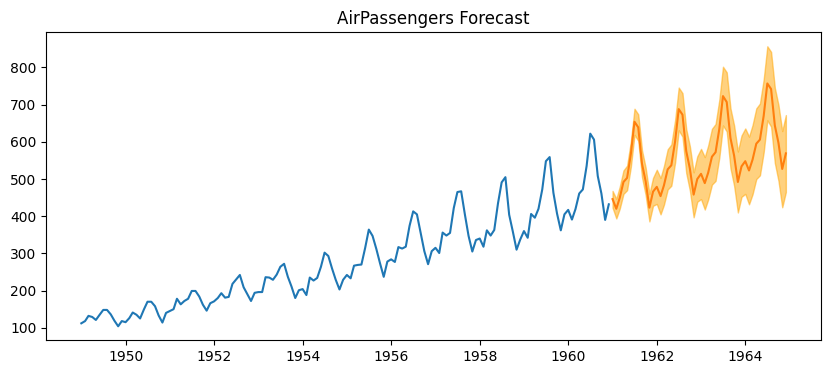

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
plt.plot(df["Passengers"])
plt.plot(df_forecast["forecast"])
plt.title("AirPassengers Forecast")
plt.fill_between(
    df_forecast.index,
    df_forecast["lower"],
    df_forecast["upper"],
    color="orange",
    alpha=0.5
)
plt.show()

In [ ]:
df_forecast.to_csv('Forecast_Results.csv')